In [3]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [4]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

2025-07-02 15:02:53,017 - INFO - Connecting to SGSA100 (RohdeSchwarzSGS100A)


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114907, firmware:4.2.366.0-5.00.232.72) in 0.02s


2025-07-02 15:02:53,043 - INFO - Successfully connected to SGSA100
2025-07-02 15:02:53,044 - INFO - Successfully connected to zi


[2025.07.02 15:02:53.049] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.02 15:02:53.052] INFO    VERSION: laboneq 2.54.0
[2025.07.02 15:02:53.054] INFO    Connecting to data server at localhost:8004
[2025.07.02 15:02:53.059] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.02 15:02:53.069] INFO    Configuring the device setup
[2025.07.02 15:02:53.082] INFO    The device setup is configured


2025-07-02 15:02:53,085 - INFO - Setting up instruments
2025-07-02 15:02:53,086 - INFO - Setting frequency to 11 GHz for SGSA100
2025-07-02 15:02:53,087 - INFO - Setting power to -20 dB for SGSA100
2025-07-02 15:02:53,091 - INFO - Before exp
2025-07-02 15:02:53,092 - INFO - Turning on SGSA100


[2025.07.02 15:02:53.105] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.02 15:02:53.106] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.07.02 15:02:53.107] INFO    Starting LabOne Q Compiler run...
[2025.07.02 15:02:53.133] INFO    Schedule completed. [0.025 s]
[2025.07.02 15:02:53.165] INFO    Code generation completed for all AWGs. [0.030 s]
[2025.07.02 15:02:53.166] INFO    Completed compilation step 1 of 1. [0.058 s]
[2025.07.02 15:02:53.168] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.02 15:02:53.169] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.02 15:02:53.170] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.02 15:02:53.171] INFO      shfqc_0        0         21            0           1      8000  
[2025.07.02 15:02:53.172] INFO      shfqc_0_sg    

2025-07-02 15:02:53,179 - INFO - Setting frequency to 7 GHz for SGSA100
2025-07-02 15:02:53,181 - INFO - Setting power to -20 dB for SGSA100


[2025.07.02 15:02:53.511] INFO    Starting near-time execution...
[2025.07.02 15:02:53.696] WARNING SHFQC/QA:dev12183: Channel 0 Input overrange count: 3
[2025.07.02 15:02:53.746] INFO    Finished near-time execution.


2025-07-02 15:02:53,786 - INFO - Turning off SGSA100
2025-07-02 15:02:53,797 - ERROR - Error while analyzing the data x and y must have same first dimension, but have shapes (0,) and (201,)
Traceback (most recent call last):
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\sqil_core\experiment\_experiment.py", line 264, in run_with_plottr
    anal_res = self.analyze(storage_path_local, *args, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\rr_spec.py", line 146, in analyze
    ax.plot(freq, np.abs(data))
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\matplotlib\axes\_axes.py", line 1777, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\AppD

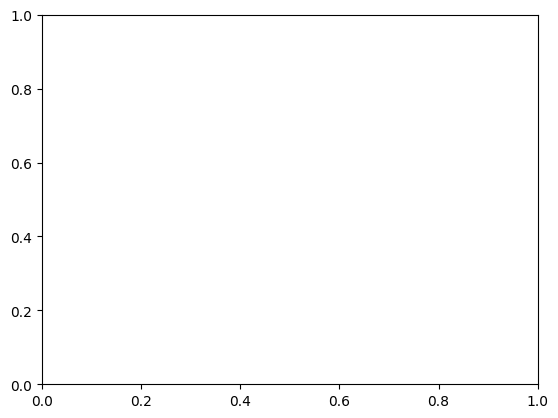

In [5]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.4626e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 200

result = rr_spec.run(
    np.linspace(ro_freq - 20e6, ro_freq + 20e6, 201),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"ro_power": np.linspace(-40, 0, 11)},
    options=options
)

### Qubit specroscopy

In [6]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

qu_freq = 5.3748e9

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 1000
options.averaging_mode = AveragingMode.CYCLIC

result = qu_spec.run(
    np.linspace(qu_freq - 40e6, qu_freq + 40e6, 401),
    # sweeps={"spectroscopy_amplitude": np.linspace(0,1,5)},
    options=options,
)

2025-07-02 15:02:53,931 - INFO - Connecting to SGSA100 (RohdeSchwarzSGS100A)


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114907, firmware:4.2.366.0-5.00.232.72) in 0.04s


2025-07-02 15:02:53,971 - INFO - Successfully connected to SGSA100
2025-07-02 15:02:53,972 - INFO - Successfully connected to zi


[2025.07.02 15:02:53.977] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.02 15:02:53.978] INFO    VERSION: laboneq 2.54.0
[2025.07.02 15:02:53.979] INFO    Connecting to data server at localhost:8004
[2025.07.02 15:02:53.981] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.02 15:02:53.981] INFO    Configuring the device setup
[2025.07.02 15:02:53.997] INFO    The device setup is configured


2025-07-02 15:02:53,999 - INFO - Setting up instruments
2025-07-02 15:02:54,000 - INFO - Setting frequency to 11 GHz for SGSA100
2025-07-02 15:02:54,002 - INFO - Setting power to -20 dB for SGSA100
2025-07-02 15:02:54,004 - INFO - Before exp
2025-07-02 15:02:54,005 - INFO - Turning on SGSA100


[2025.07.02 15:02:54.016] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.02 15:02:54.017] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.07.02 15:02:54.017] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/measure' to HARDWARE
[2025.07.02 15:02:54.018] INFO    Starting LabOne Q Compiler run...
[2025.07.02 15:02:54.180] INFO    Schedule completed. [0.160 s]
[2025.07.02 15:02:54.254] INFO    Code generation completed for all AWGs. [0.073 s]
[2025.07.02 15:02:54.255] INFO    Completed compilation step 1 of 1. [0.235 s]
[2025.07.02 15:02:54.257] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.02 15:02:54.258] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.02 15:02:54.259] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.02 15:02:

2025-07-02 15:02:54,269 - INFO - Setting frequency to 7 GHz for SGSA100
2025-07-02 15:02:54,271 - INFO - Setting power to -20 dB for SGSA100


[2025.07.02 15:02:54.666] INFO    Starting near-time execution...


CancelledError: 

### Time Rabi

2025-06-12 13:27:59,463 - INFO - Successfully connected to zi
c:\Users\sqil\Desktop\code\sqil-experiments\measurements\setup/setup_test.py:53: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  return generate_device_setup(


[2025.06.12 13:27:59.485] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.12 13:27:59.492] INFO    VERSION: laboneq 2.53.0
[2025.06.12 13:27:59.495] INFO    Connecting to data server at localhost:8004
[2025.06.12 13:27:59.500] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.12 13:27:59.508] INFO    Configuring the device setup
[2025.06.12 13:27:59.513] INFO    The device setup is configured


2025-06-12 13:27:59,526 - INFO - Turning on local oscillators before experiment


[2025.06.12 13:27:59.546] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.06.12 13:27:59.546] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/measure' to HARDWARE
[2025.06.12 13:27:59.546] INFO    Starting LabOne Q Compiler run...
[2025.06.12 13:27:59.559] INFO    Schedule completed. [0.007 s]
[2025.06.12 13:27:59.577] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.12 13:27:59.577] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.12 13:27:59.577] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.12 13:27:59.577] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skip

2025-06-12 13:28:02,279 - INFO - Turning off local oscillators after experiment


nrmse       0.02771  GOOD
reduced χ²  1.104    GOOD
| Param   |   Fitted value |   STD error |   % Error |
|---------|----------------|-------------|-----------|
| A       |   -0.000281547 |   7.369e-06 |     -2.62 |
| tau     |    1.65459e-05 |   1.947e-05 |    117.68 |
| y0      |    0.000156554 |   2.48e-06  |      1.58 |
| phi     |    3.99506e-07 |   4.805e-10 |      0.12 |
| T       |    2.04645e-07 |   5.258e-10 |      0.26 |



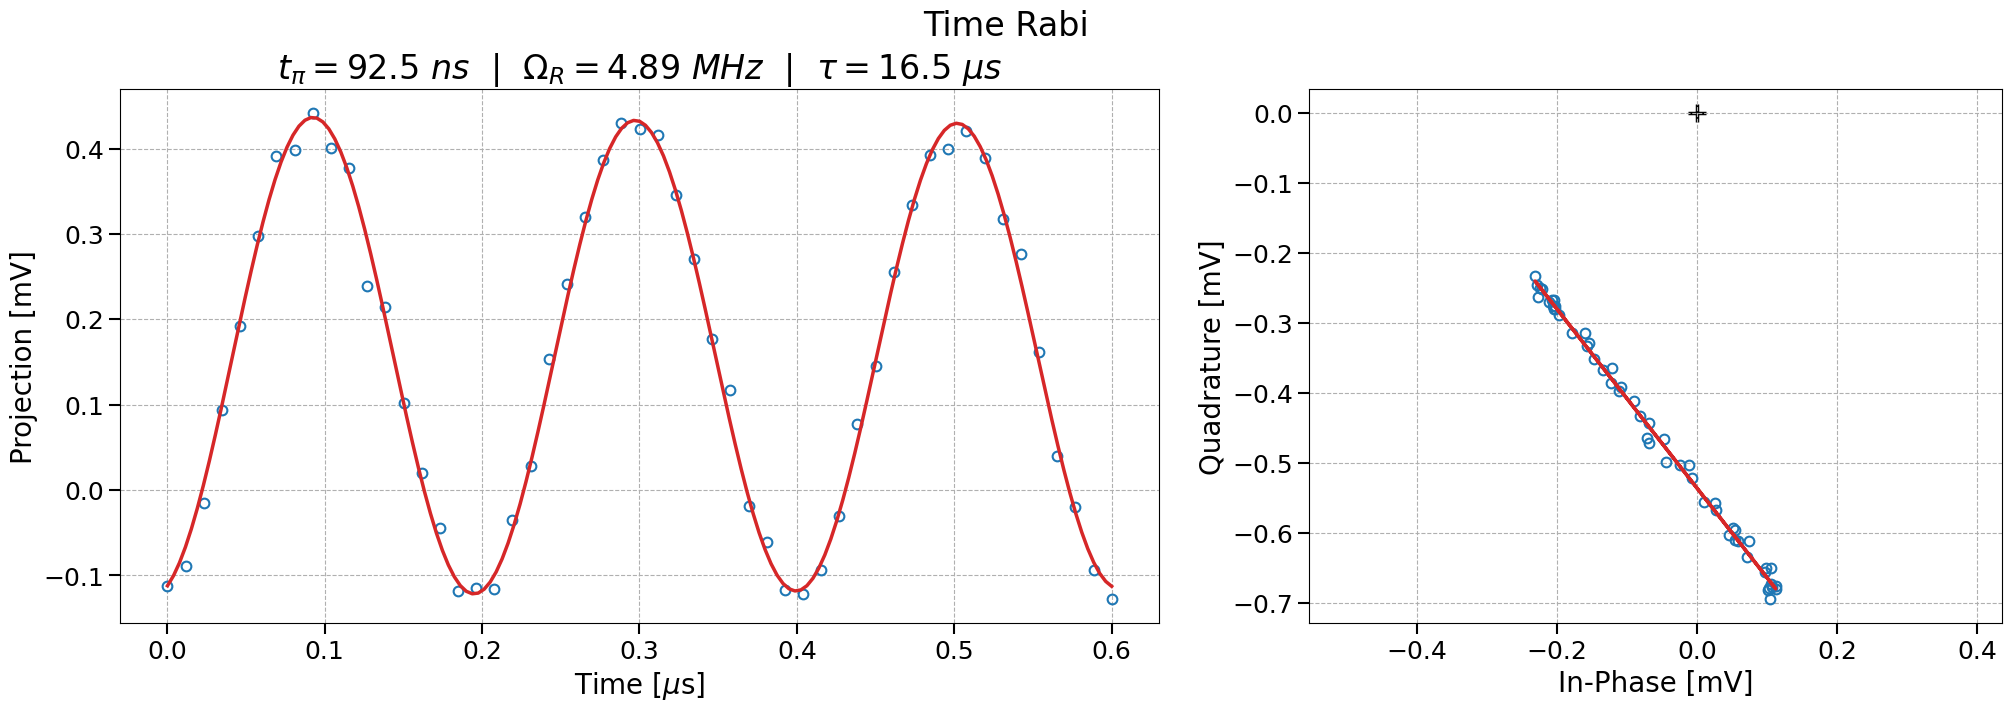

In [ ]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode
%matplotlib inline

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**8
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    np.linspace(1e-10,600e-9, 53),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"ro_power": np.linspace(-40, 0, 11)},
    options=options,
)

### Tests

In [ ]:
import numpy as np
10 + 20 * np.log10(1)

C:\Users\sqil\AppData\Local\Temp\ipykernel_45228\3519243428.py:2: RuntimeWarning: divide by zero encountered in log10
  10 + 20 * np.log10(0)


np.float64(-inf)

2025-07-13 00:13:45,052 - INFO - Successfully connected to zi


[2025.07.13 00:13:45.057] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.13 00:13:45.059] INFO    VERSION: laboneq 2.54.0
[2025.07.13 00:13:45.060] INFO    Connecting to data server at localhost:8004
[2025.07.13 00:13:45.063] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.13 00:13:45.074] INFO    Configuring the device setup
[2025.07.13 00:13:45.079] INFO    The device setup is configured


2025-07-13 00:13:45,079 - INFO - Setting up instruments
2025-07-13 00:13:45,079 - INFO - Before exp


[2025.07.13 00:13:45.091] INFO    Starting LabOne Q Compiler run...
[2025.07.13 00:13:45.240] INFO    Schedule completed. [0.146 s]
[2025.07.13 00:13:45.312] INFO    Code generation completed for all AWGs. [0.059 s]
[2025.07.13 00:13:45.313] INFO    Completed compilation step 1 of 1. [0.209 s]
[2025.07.13 00:13:45.315] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 00:13:45.316] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.13 00:13:45.317] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 00:13:45.318] INFO      shfqc_0        0         21            0           1      8000  
[2025.07.13 00:13:45.318] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.07.13 00:13:45.319] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 00:13:45.320] INFO      TOTAL                    30            1                  8000 

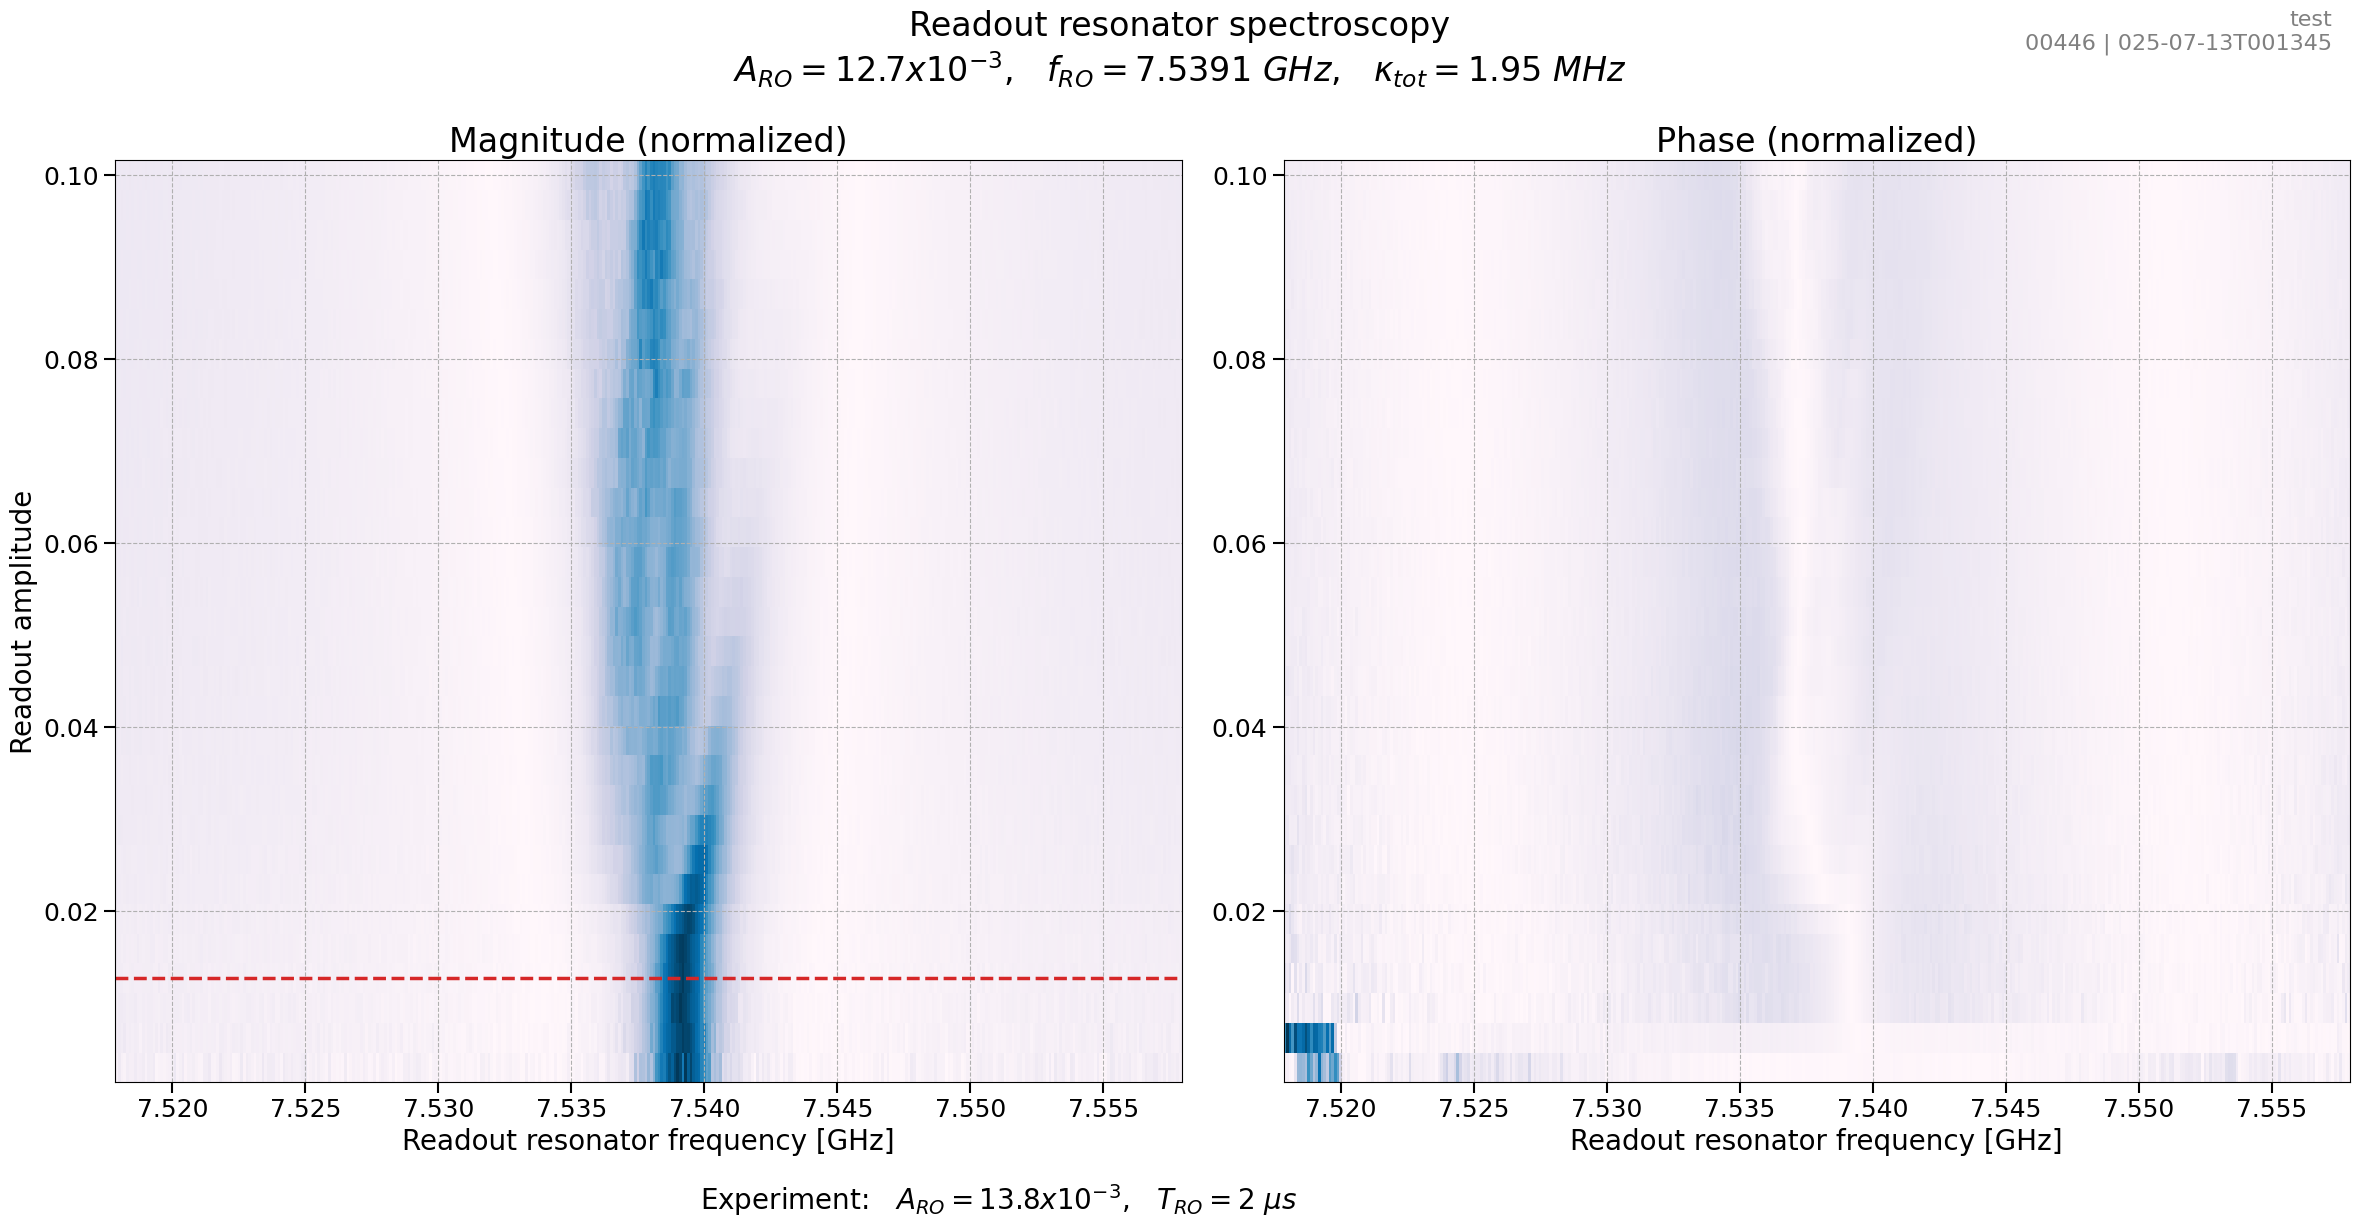

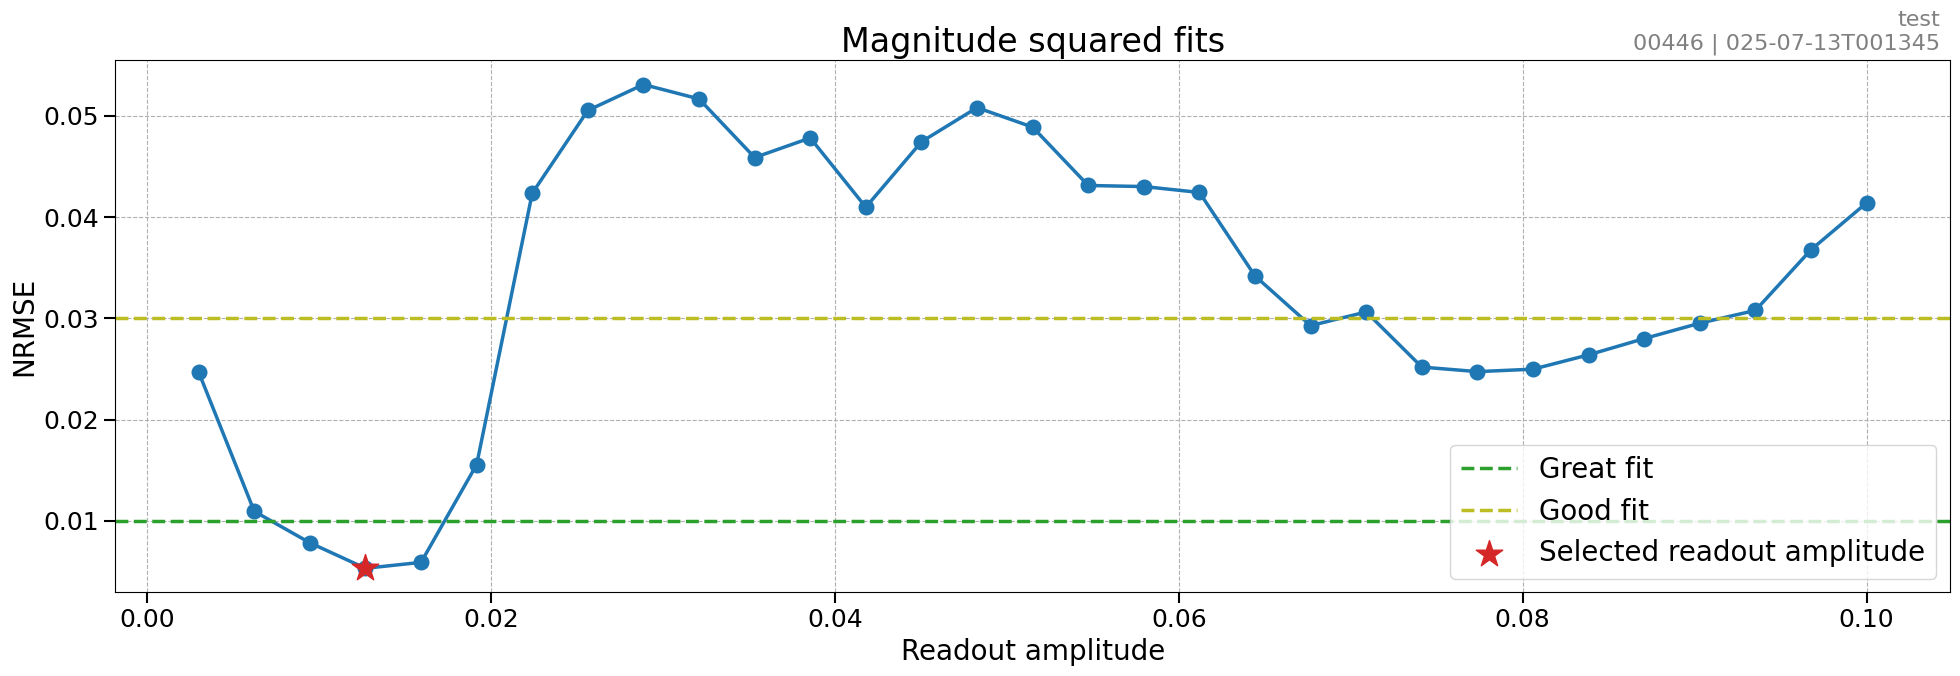

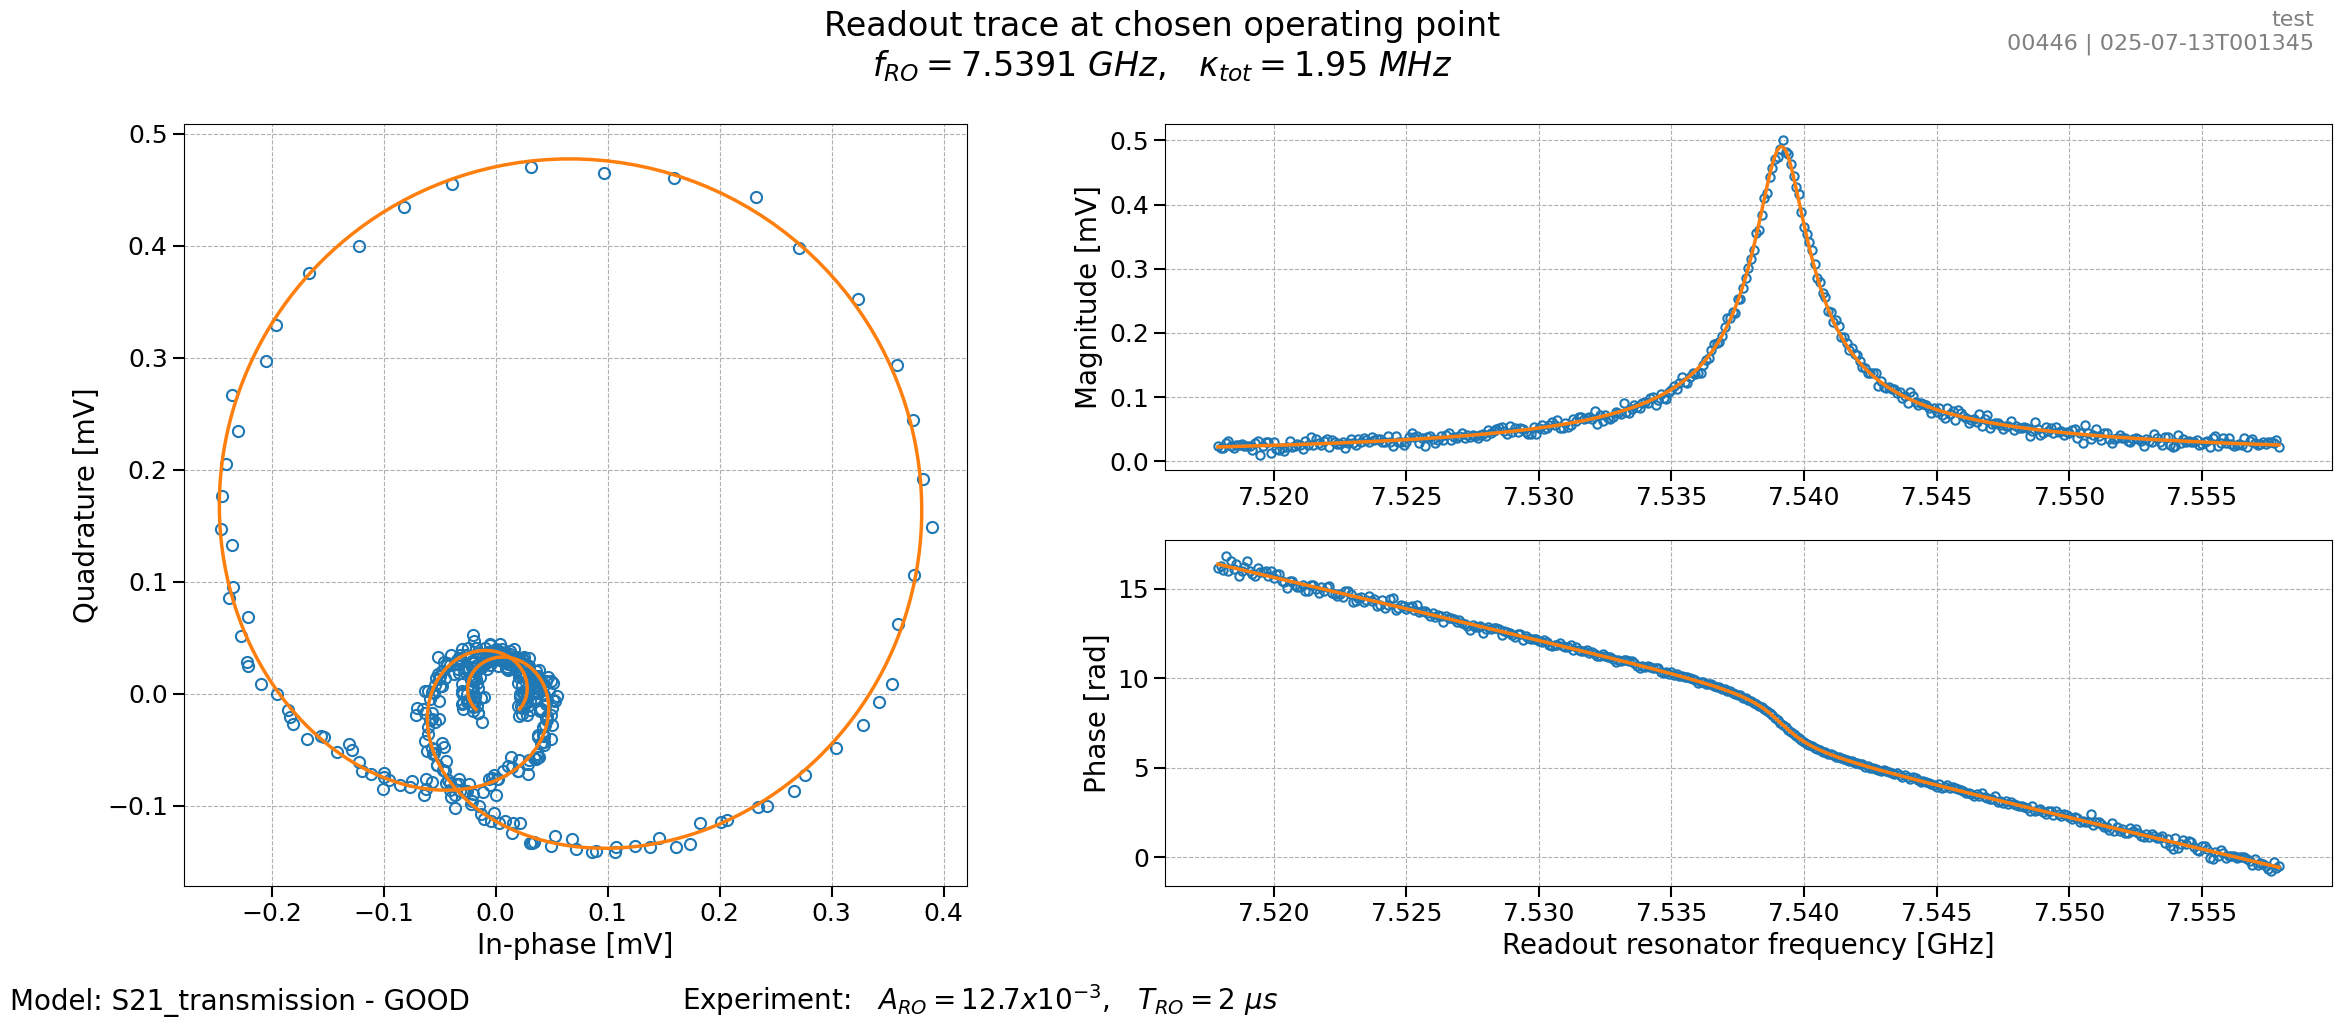

In [6]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    np.linspace(ro_freq + 20e6, ro_freq - 20e6, 401),
    sweeps={"readout_amplitude": np.linspace(0.003, 0.1, 31)},
    options=options,
)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


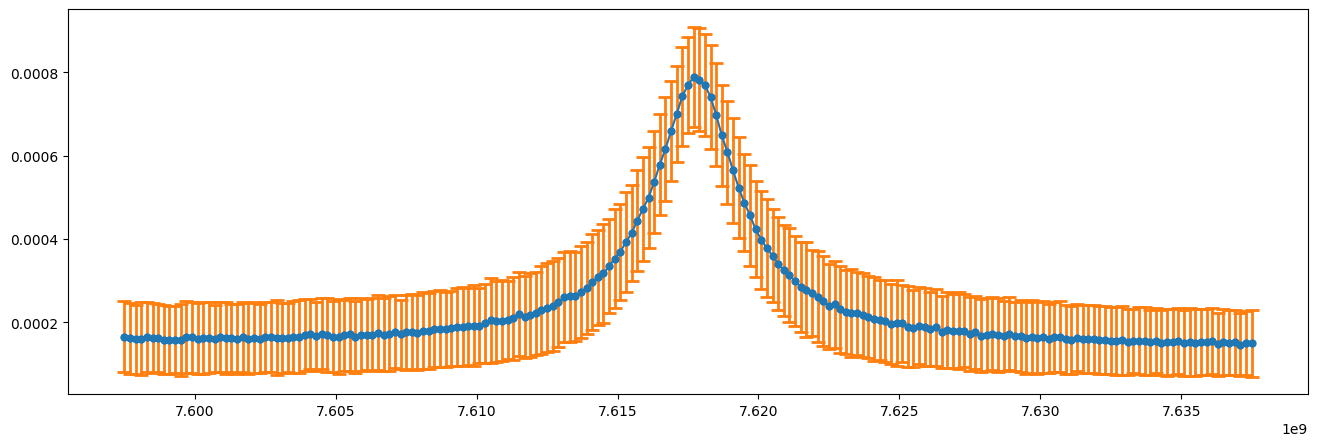

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

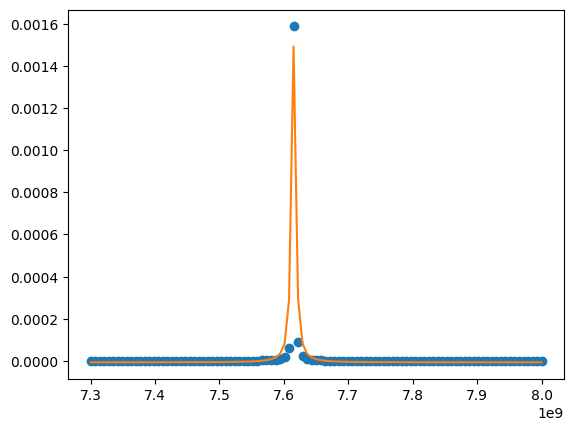

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

fit_res = sqil.fit.fit_lorentzian(freq, np.abs(data)**2)

plt.plot(freq, np.abs(data)**2, 'o')
plt.plot(freq, fit_res.predict(freq))
plt.show()

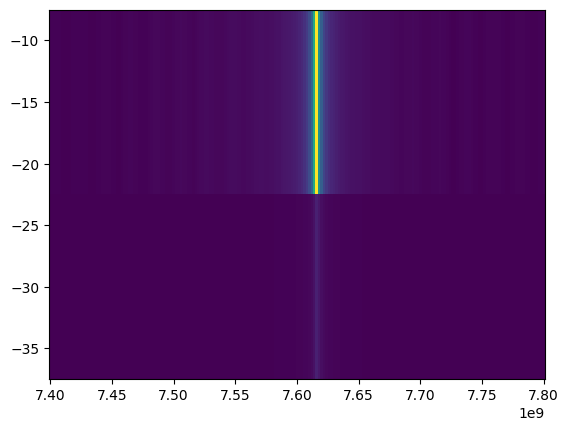

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


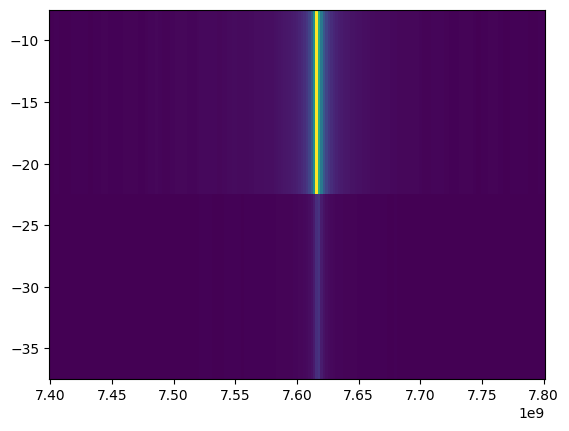

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

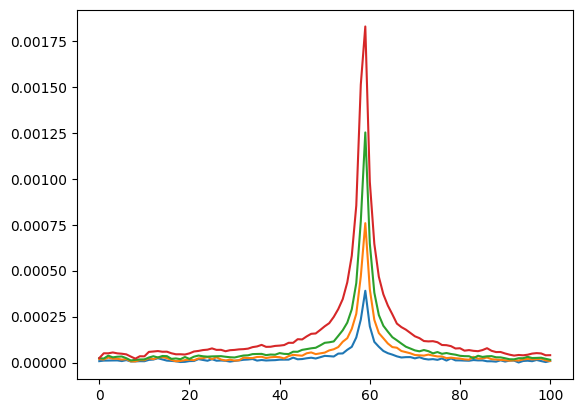

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)